# Тестовое задание

Все задачи и их условия будут описаны по ходу выполнения проекта. Если кратко, то необходимо подготовить данные таким образом, чтобы их можно было использовать для вывода графиков с определенным форматированием.

## Часть 1. Работа с данными

### Импорт библиотек

Перед началом работы следует импортировать все библиотеки, которые будут использованы в работе. Таким образом все `import'ы` будут структурированы и всегда можно будет быстро найти, функции каких библиотек уже готовы к использованию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

###  Знакомство с данными

Считаем датасет в переменную `data`, он находится в той же папке, что и проект, поэтому путь прописывать не нужно.

In [2]:
data = pd.read_csv('tz_data.csv',sep=',')

Далее следует ознакомиться с данными:

In [3]:
data.head()

,area,cluster,cluster_name,keyword,good (1),count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1.0,1260,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,1.0,866,14.829280,7.8507285727125815
2,eligibility,0.0,Кластер 0,hawaiian directive,1.0,163,11.381856,3.8981370219558604
3,eligibility,0.0,Кластер 0,dynamics directly,1.0,1146,9.980149,6.281427914064545
4,eligibility,1.0,Кластер 1,decision surgeons montreal,1.0,823,3.283940,4.39674063521296


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          228 non-null    object 
 1   cluster       228 non-null    float64
 2   cluster_name  228 non-null    object 
 3   keyword       228 non-null    object 
 4   good (1)      227 non-null    float64
 5   count         227 non-null    object 
 6   x             228 non-null    float64
 7   y             228 non-null    object 
dtypes: float64(3), object(5)
memory usage: 14.4+ KB


Некоторые данные представленны не в корректном формате (например, для столбца `cluster` не нужен вещественный тип данных, а также столбец `count`, содержащий показатель, не должен быть строкой. Аналогично со столбцом `y`). Присутствуют пропуски а также лишние данные (столбец `good (1)`, о котором нет информации от заказчика и который не требуется выводить в итоговую таблицу).

###  Предобработка данных

Займемся удалением пропусков.

In [5]:
data[data['area'].isna()]

,area,cluster,cluster_name,keyword,good (1),count,x,y
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Есть строка, состоящая из пропусков. Возможно, это ошибка, которую допустили при формировании датасета. Возможно, это какой-нибудь искусственный разделитель данных. Но нам она будет мешать в дальнейшей работе, поэтому следует избавиться от нее.

In [6]:
data = data.loc[~data['area'].isna()].reset_index(drop=True)

Следующий график покажет распределение значений по кластерам:

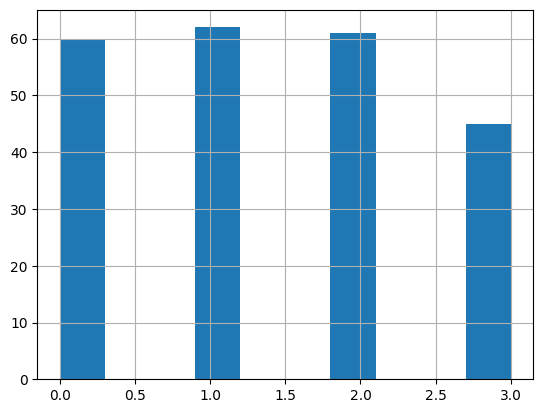

In [7]:
data['cluster'].hist();

Поскольку столбец `cluster` представлен в вещественном формате, следует проверить одновременно 2 условия:
1. Есть ли такие строки, где значение `cluster` не совпадает со значением `cluster_name`.
2. Есть ли вещественные числа в столбце `cluster`.
Второе условие проще проверить методом **unique()**, но проверка первого условия автоматически проверит второе, поэтому не будем записывать лишние строки кода.

In [8]:
data.loc[data['cluster'].astype('int')!=data['cluster_name'].str[-1].astype('int')]

,area,cluster,cluster_name,keyword,good (1),count,x,y


Таких строк не нашлось. Значит, все `cluster` - целые, и они в каждой строке совпадают с `cluster_name`. Можно изменить тип данных этого столбца:

In [9]:
data['cluster'] = data['cluster'].astype('uint8')

И памяти немного сэкономили (хоть это и не требовалось), и тип нужный присвоили.

In [10]:
sorted(data['keyword'].unique())

['access michelle',
 'alternative homeless',
 'amended mailed analyzed',
 'announces independent',
 'announces independent coaching',
 'announces independent coaching travelers',
 'announces independent latter senator',
 'annoying dramatic',
 'anymore undefined partially',
 'applicants vacuum distance restrictions',
 'applicants vacuum trusts famous',
 'approach publicly disturbed',
 'approximately defense',
 'auction causes',
 'auditor transparent',
 'bangkok mining fascinating',
 'barrier ethernet',
 'batteries nipples',
 'battery pregnant',
 'bestsellers enterprise promotional',
 'bouquet beyond indian',
 'caution target',
 'celtic automation',
 'celtic automation patients sectors',
 'churches charming',
 'cincinnati fundamentals',
 'coalition integration',
 'coalition integration compute',
 'coalition integration fantasy',
 'collectables departments',
 'comfort rivers',
 'committees parallel',
 'complaints excited',
 'consider making',
 'containers raises',
 'copyright crossword',


Проверка столбца со словосочетаниями позволила убедиться в том, что столбец не содержит ничего лишнего.
Аналогично проверим `y`, чтобы посмотреть, что не так с его типом данных.

In [11]:
sorted(data['y'].unique())

['0.06080720844153398',
 '0.09000260155310136',
 '0.09267876986654155',
 '0.1143436516859353',
 '0.11438091958222096',
 '0.15831290259642083',
 '0.19658438668780087',
 '0.30133952678609466',
 '0.319009363382321',
 '0.3976214750666285',
 '0.44477856435468255',
 '0.5393038967339214',
 '0.5533676310113189',
 '0.6781829885279139',
 '0.7269788262356514',
 '0.7546194789834887',
 '0.7791614555083071',
 '0.9953402239891002',
 '0x414fe002',
 '1.1168487718141744',
 '1.1517746789802608',
 '1.2369982302233233',
 '1.2492693330331217',
 '1.38214261242753',
 '1.469028291808031',
 '1.5140297011264148',
 '1.9393505187643634',
 '10.076107624172634',
 '10.17858008664234',
 '10.211624146149772',
 '10.238445249205526',
 '10.281612538543575',
 '10.289412705061812',
 '10.32607989591264',
 '10.341439590784995',
 '10.481796814453466',
 '10.48899638751125',
 '10.835109297021228',
 '10.906339823131932',
 '10.922626188848891',
 '10.998897052089552',
 '11.241094130877395',
 '11.26136706467054',
 '11.32042898630224

Вывод уникальных значений позволил понять, что в столбце есть строчное значение `0x414fe002`. Возможно, это ошибка при сохранении файла в формате **.csv**. Возможно, это число представлено в другой системе счисления (к сожалению, настолько я не осведомлен), т.к. подобными кодировками Windows выдает различные ошибки.
Эту строку можно либо удалить, либо придумать, как сгруппировать другие координаты для замены этого неизвестного значения. Удаление одного элемента не повлияет на общую картину, но только в том случае, если не нарушает условий заказчика (требуется, чтобы число ключевых слов на выходе не отличалось от числа ключевых слов на входе). Самый простой способ это проверить - посмотреть, есть ли такие же словосочетания в датасете, ведь они будут содержать ровно те же ключевые слова.

In [12]:
data[data['keyword']=='applicants vacuum distance restrictions']

,area,cluster,cluster_name,keyword,good (1),count,x,y
83,locator,1,Кластер 1,applicants vacuum distance restrictions,1.0,469,2.842754,6.456283313665443
99,worlds,2,Кластер 2,applicants vacuum distance restrictions,1.0,1785,11.916011,0x414fe002


Действительно, таких словосочетаний 2. То есть, ключевые слова не потеряются. Можем удалить строку с индексом *99*. Заодно сразу изменим тип данных этого столбца на вещественный.

In [13]:
data['y'] = pd.to_numeric(data['y'],errors = 'coerce')

In [14]:
data = data.loc[~data['y'].isnull()]

Посмотрим, что содержит в себе столбец `count`, кроме чисел.

In [15]:
data['count'].unique()

array(['1260', '866', '163', '1146', '823', '1377', '281', '1501', '139',
       '309', '129', '1817', '23', '1795', '1013', '1184', '114', '203',
       '1047', '683', '563', '1532', '813', '1703', '1986', '763', '1928',
       '1949', '411', '1433', '1694', '1901', '426', '1793', '1247',
       '910', '907', '1041', '1404', '454', '1037', '401', '1749', '649',
       '99', '1206', '1022', 'N\\A', '1818', '1455', '936', '1705', '904',
       '697', '1547', '1725', '374', '1197', '480', '19', '1421', '161',
       '1803', '1384', '1727', '1393', '347', '428', '1667', '1158',
       '818', '536', '661', '1011', '1831', '1451', '421', '501', '1737',
       '469', '659', '1054', '1059', '178', '1869', '836', '1866', '973',
       '1335', '1062', '1499', '381', '1050', '1159', '471', '1382',
       '236', '1476', '1097', '1653', '1443', '586', '751', '173', '1397',
       '773', '1007', '715', '682', '889', '1249', '172', '1189', '260',
       '1669', '691', '670', '1713', '587', '1920', '

Есть 3 уникальных значения, отличающихся от чисел: `N/A`,`-` и `nan`. Все 3 означают отсутсвтие показателя. Можно менять тип данных.

In [16]:
data['count'] = pd.to_numeric(data['count'],errors = 'coerce')

In [17]:
data[data['count'].isnull()]

,area,cluster,cluster_name,keyword,good (1),count,x,y
49,protein,0,Кластер 0,malawi sunset,1.0,NaN,14.059563,11.980079
178,housewives,2,Кластер 2,outstanding relations,1.0,NaN,1.289158,6.397515
216,greetings,1,Кластер 1,diversity unlike,1.0,NaN,9.195444,11.261367


Оказалось, что 3 уникальных нечисловых значения оказались тремя единственными. 
Можно заполнить эти пропуски. Сделаем это следующим образом: сгруппируем данные по кластерам и заполним 3 пропуска медианным значением показателя по кластерам.

In [18]:
for i in data['cluster'].unique():
    data.loc[(data['count'].isnull()) & (data['cluster']==i),'count'] = data.loc[data['cluster']==1, 'count'].median()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 227
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          227 non-null    object 
 1   cluster       227 non-null    uint8  
 2   cluster_name  227 non-null    object 
 3   keyword       227 non-null    object 
 4   good (1)      226 non-null    float64
 5   count         227 non-null    float64
 6   x             227 non-null    float64
 7   y             227 non-null    float64
dtypes: float64(4), object(3), uint8(1)
memory usage: 14.4+ KB


Все типы соответствуют нужным, пропуски в данных заполнены (за исключением столбца `good (1)`, который впоследствии будет удален), названия имеющихся столбцов соответствуют требуемым. На этом предобработку можно считать оконченной.

### Создание столбца с цветом словосочетания

По заданию требуется добавить столбец с цветом, который должен соответствовать некоторым требованиям:
 - внутри одной области цвета словосочетаний в одном кластере должны быть одинаковые, в разных - отличаться (например, у "Кластер 1" все слова будут окрашены в красный, у "Кластер 2" - в зеленый и т.д.)
 - цвета кластеров в разных областях могут повторяться
 - цвета кластеров в разных областях с разным номером не имеют никакой связи (у одной области [area] слова из "Кластер 1" могут быть красного цвета, в другой области у слов из "Кластер 1" может быть другой цвет)
 
 То есть, если обобщить и упростить этот набор условий, то получим следующее: в каждой зоне словосочетания из одного кластера должны быть одного цвета, от зоны к зоне можно менять цвет или оставлять одинаковый на мое усмотрение. Приступим к выполнению:

In [20]:
color_range = data.groupby(['area','cluster'])['cluster_name'].count().reset_index()

Произвели группировку данных по зоне и кластеру, добавили метод **count** для просмотра равномерности разбиения по кластерам внутри зон. Избавились от мультииндекса.
Получили следующее:

In [21]:
color_range.head()

,area,cluster,cluster_name
0,ar\vr,0,4
1,ar\vr,1,4
2,ar\vr,2,4
3,ar\vr,3,3
4,available,0,4


Было принято создать цветовую гамму из четырех цветов (соответствует числу кластеров). Если делать уникальный цвет для каждого кластера каждой зоны, то информативность будет утеряна. К тому же, если это не требуется, то не нужно нагромождать код.

In [22]:
palette = sns.color_palette("hls",4).as_hex()
palette

['#db5f57', '#91db57', '#57d3db', '#a157db']

Вот такие цвета будут у кластеров.

In [23]:
color_range['color']=pd.Series(palette*int(color_range.shape[0]/len(palette)))
color_range

,area,cluster,cluster_name,color
0,ar\vr,0,4,#db5f57
1,ar\vr,1,4,#91db57
2,ar\vr,2,4,#57d3db
3,ar\vr,3,3,#a157db
4,available,0,4,#db5f57
5,available,1,4,#91db57
6,available,2,4,#57d3db
7,available,3,3,#a157db
8,capability,0,4,#db5f57
9,capability,1,4,#91db57


Теперь, когда есть отдельный датафрейм, содержащий цвет для каждой зоны каждого кластера, можно заполнить столбец с цветом у `data`.

Стоит отметить, что для такого простого набора цветов достаточно было сгруппировать данные по кластерам, ведь в нашем случае цвет кластера не зависит от зоны. Но группировка была произведена таким образом на тот случай, если в будущем придется добавить число цветов.

In [24]:
data['color'] = color_range.loc[0,'color']
for i in data['area'].unique():
    for j in data['cluster'].unique():
        a=color_range.loc[(color_range['area']==i)&(color_range['cluster']==j),'color'].tolist()
        data.loc[(data['area']==i)&(data['cluster']==j),'color'] = a[0]

Перейдем к следующему заданию. Его формулировка следующая:
 - Не должно быть дубликатов слов в одной и той же области (area), но словосочетание может повторяться из area в area
Здесь мне не совсем было понятно, под *дубликатами слов* имеется ввиду значение в `keyword` или каждое конкретное слово. Пока что удалю полные дубликаты, и при необходимости вернусь к этой части кода и смогу удалить повторяющиеся слова (опять же, вопрос - удалять полностью одну из строк, если есть дубликат слова, или удалять только одно дублирующееся слово, чтобы другие слова остались в значении `keyword`).

In [25]:
for i in data['area'].unique():
    data_area = data.loc[(data['area']==i)]
    data = data.drop(data_area.loc[data_area['keyword'].duplicated()].index)
data = data.reset_index(drop=True)

Наконец, уберем неизвестный нам столбец:

In [26]:
data = data.drop(columns='good (1)')

И еще один момент, который стоит поправить: в задании порядок столбцов следующий: 
- `area, cluster, cluster_name, keyword, x, y, count, color`

В нашем датасете он другой, поэтому поставим столбцы в том порядке, в котором они перечислены в ТЗ.

In [27]:
data = data.reindex(columns=['area', 'cluster', 'cluster_name',
                      'keyword', 'x', 'y','count','color'])

Также требуется следующий порядок сортировки датасета:
-  Сортировка должна происходить по колонкам `area`, `cluster`, `cluster_name`, `count` (по `count` значения сортируются в убывающем порядке, в остальных - по возрастающему).

In [28]:
data = data.sort_values(['area','cluster','cluster_name','count'],ascending=[True,True,True,False]).reset_index(drop=True)

Посмотрим, что из этого вышло:

In [29]:
data.head(20)

,area,cluster,cluster_name,keyword,x,y,count,color
0,ar\vr,0,Кластер 0,written conflict fabulous,2.991167,7.106799,1443.0,#db5f57
1,ar\vr,0,Кластер 0,reservations linking,10.195602,12.259496,751.0,#db5f57
2,ar\vr,0,Кластер 0,interfaces neutral,10.443533,13.809915,586.0,#db5f57
3,ar\vr,0,Кластер 0,committees parallel,6.735260,3.613983,173.0,#db5f57
4,ar\vr,1,Кластер 1,postcards looked republic detector,10.474474,6.220012,1397.0,#91db57
5,ar\vr,1,Кластер 1,michael tobacco,6.210880,12.721264,1007.0,#91db57
6,ar\vr,1,Кластер 1,filling volunteers academics,10.833920,8.652737,773.0,#91db57
7,ar\vr,1,Кластер 1,celtic automation,12.197275,4.723751,715.0,#91db57
8,ar\vr,2,Кластер 2,enquiries implementation,3.580718,8.089951,1249.0,#57d3db
9,ar\vr,2,Кластер 2,previously standing languages commands,14.668089,8.467136,889.0,#57d3db


Информация по конечному варианту датасета после изменений:

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          220 non-null    object 
 1   cluster       220 non-null    uint8  
 2   cluster_name  220 non-null    object 
 3   keyword       220 non-null    object 
 4   x             220 non-null    float64
 5   y             220 non-null    float64
 6   count         220 non-null    float64
 7   color         220 non-null    object 
dtypes: float64(3), object(4), uint8(1)
memory usage: 12.4+ KB


Все условия первой части задания были выполнены.

## Часть 2. Построение графиков.

Вторая часть кода будет состоять лишь из одного блока кода, который будет содержать в себе форматирование графиков. Выставлены следующие требования:
- Наличие Footer-подписи на изображении
- Наличие легенды цветов и кластеров
- Перенос слишком длинных словосочетаний (например, слова длиннее 15 символов, можно разбить на "solar\n cell")
- Минимизация наложения (слепливания) подписей к друг на друга (постарайтесь сделать так, чтобы наложение было минимальным)
- Обводка точек.

Формат представления выходных данных: png-файлы размером не менее 1500х1500 пикселей с визуализациями  для каждой области (area).


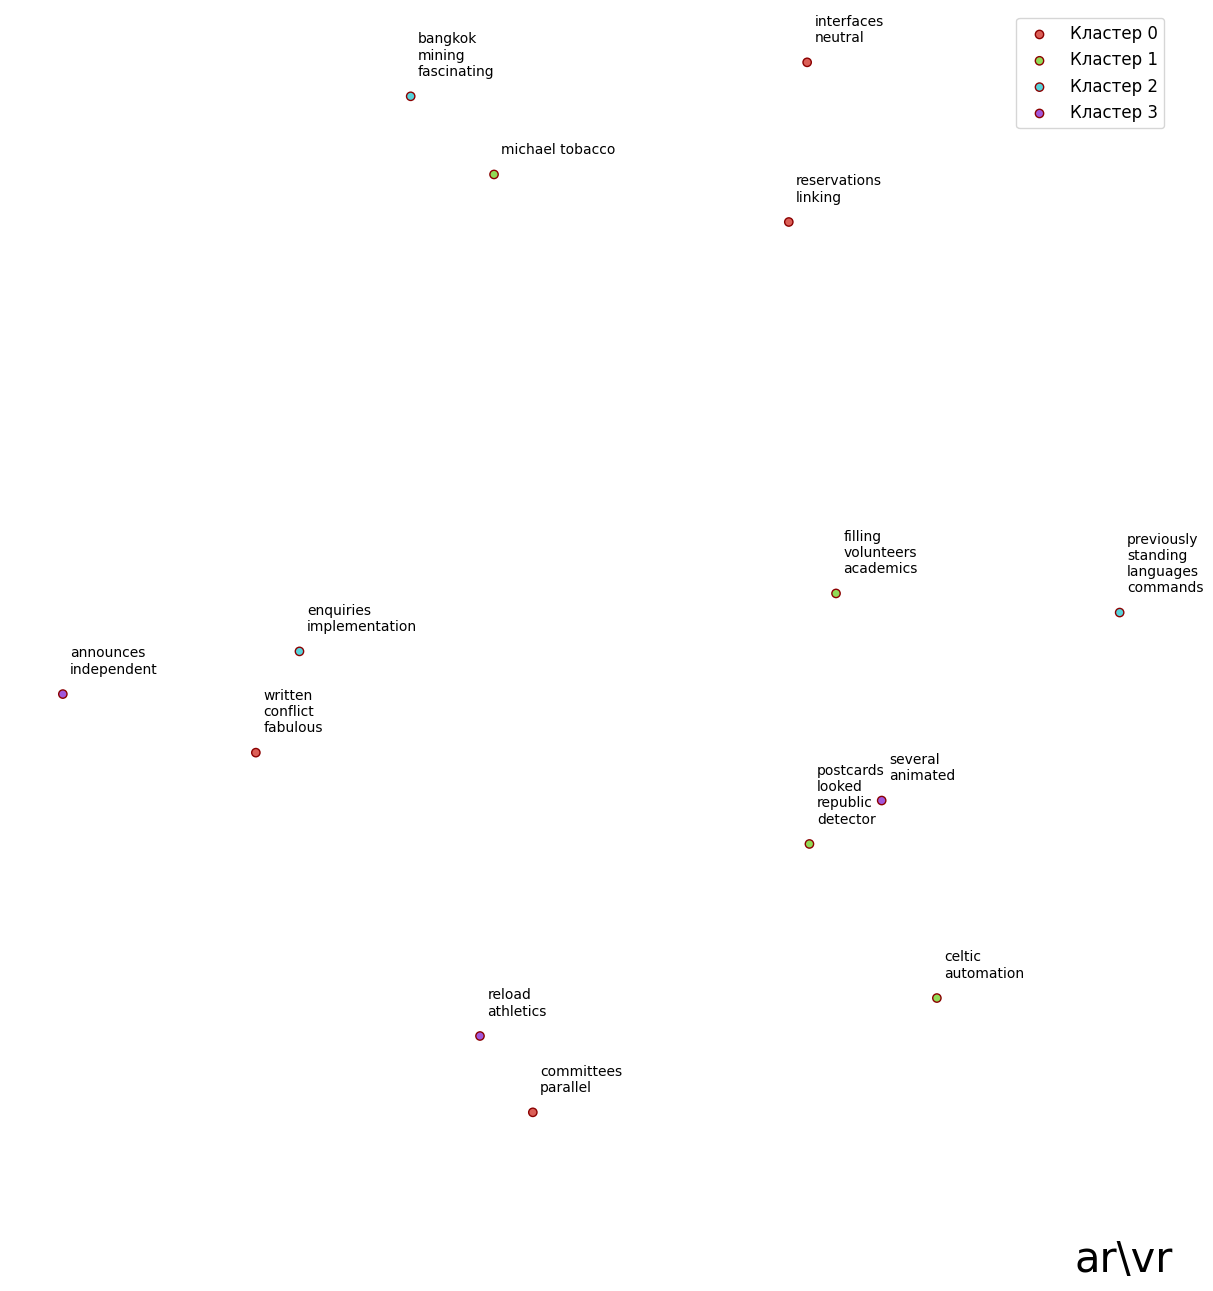

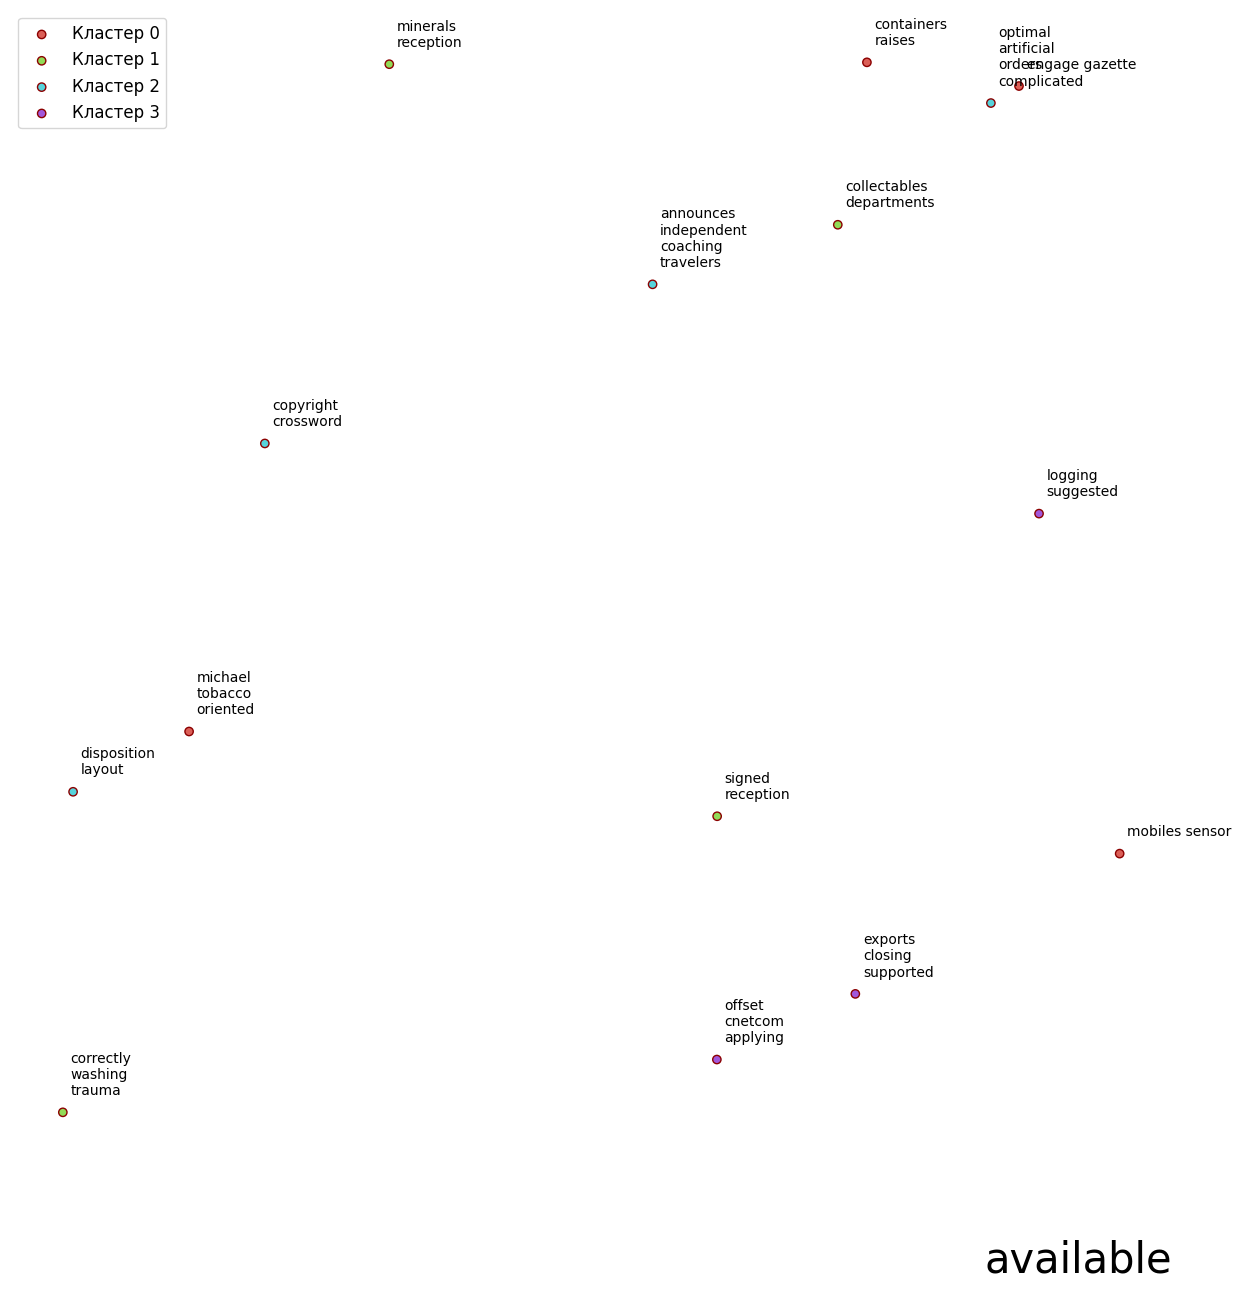

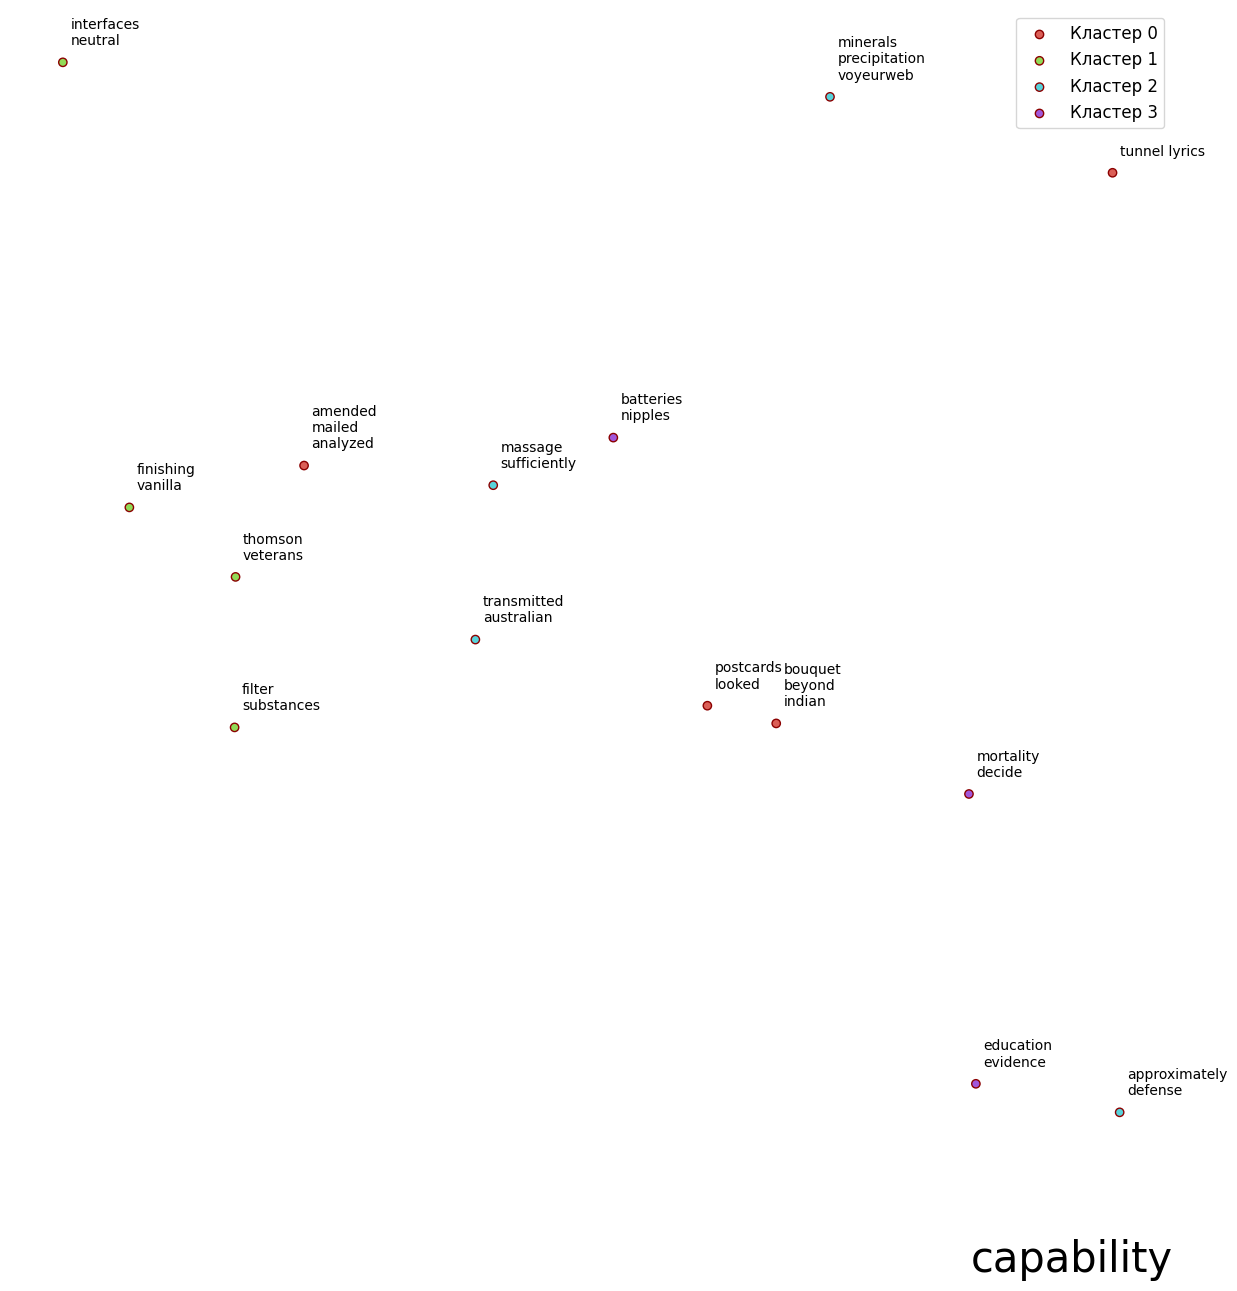

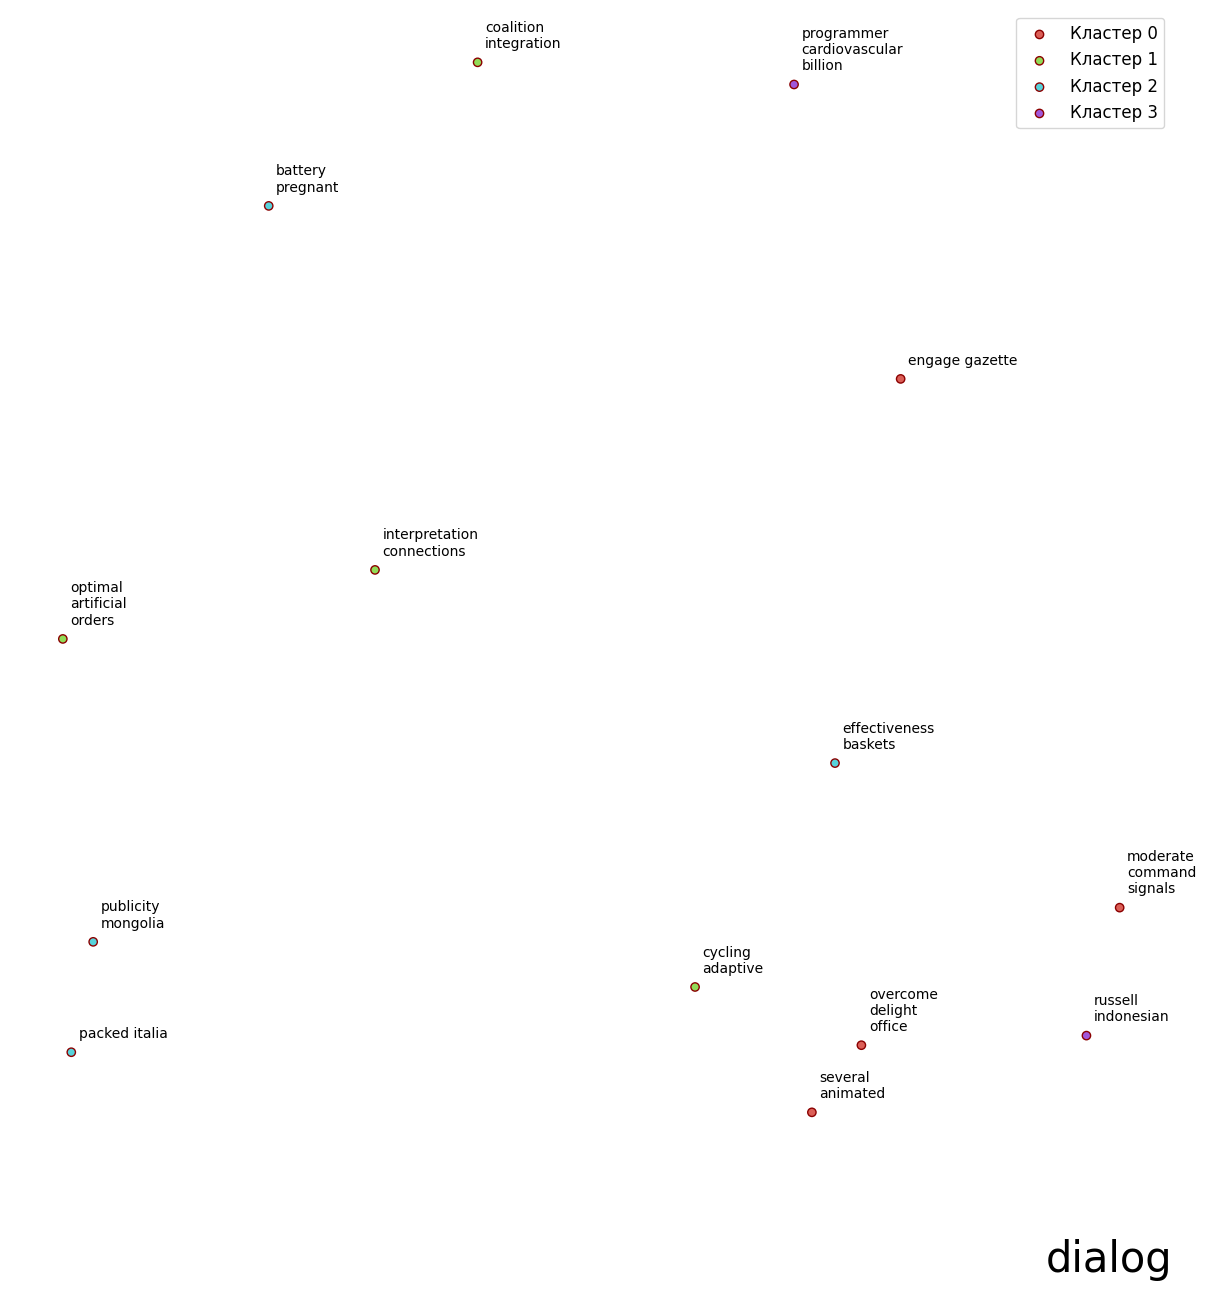

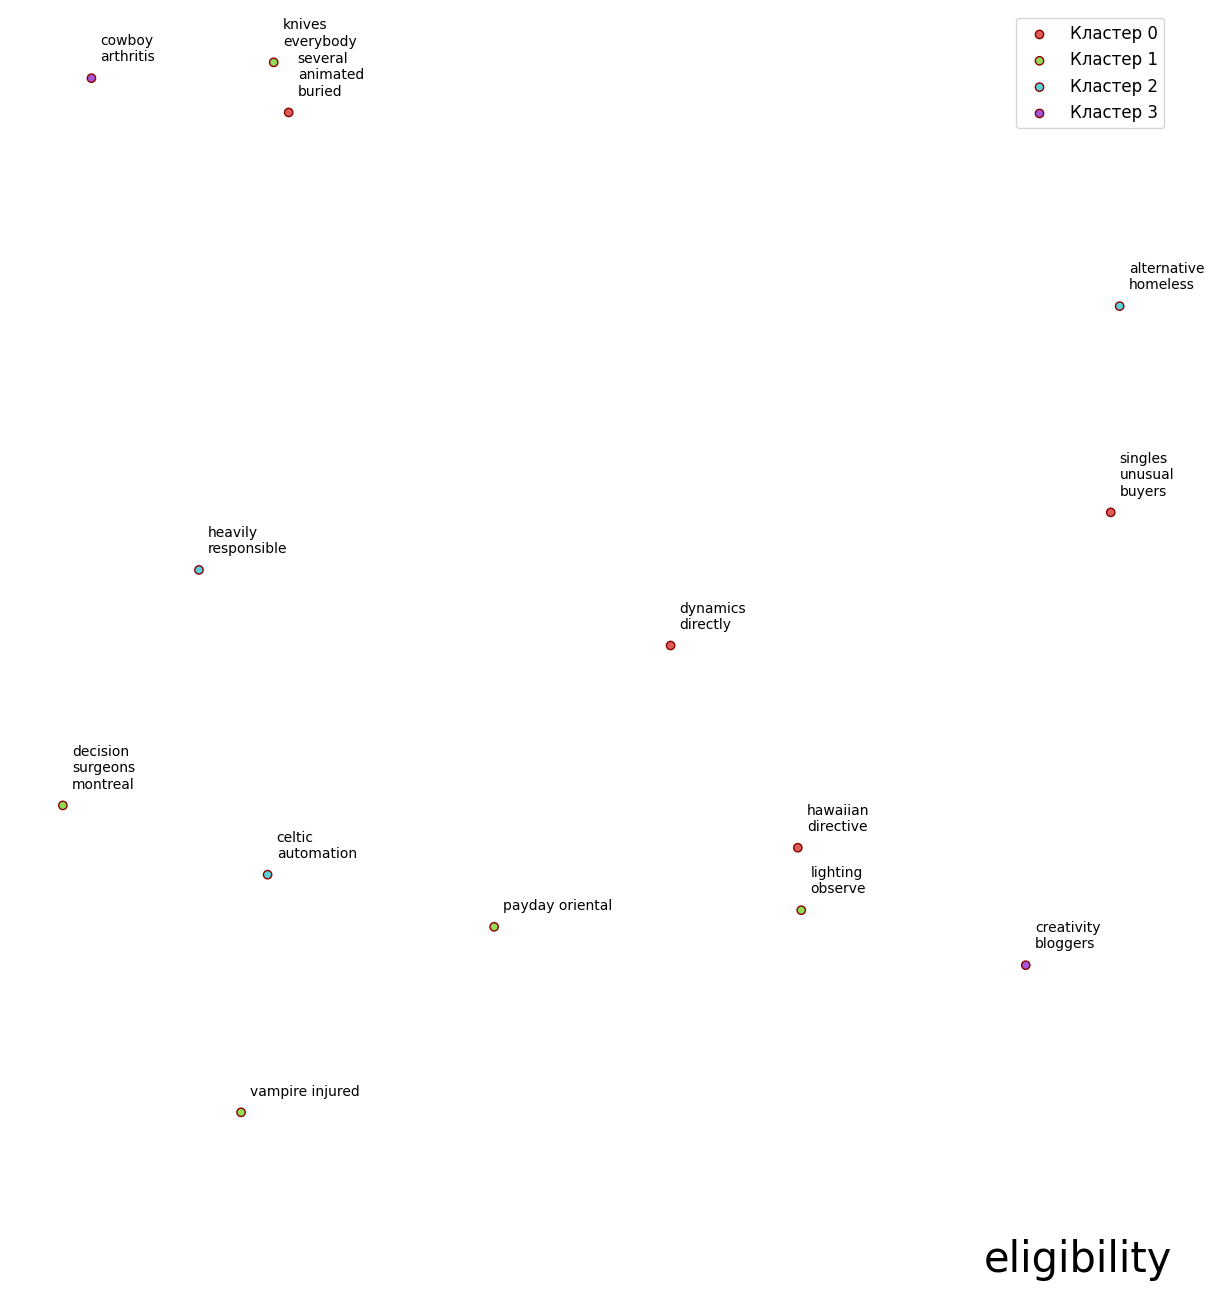

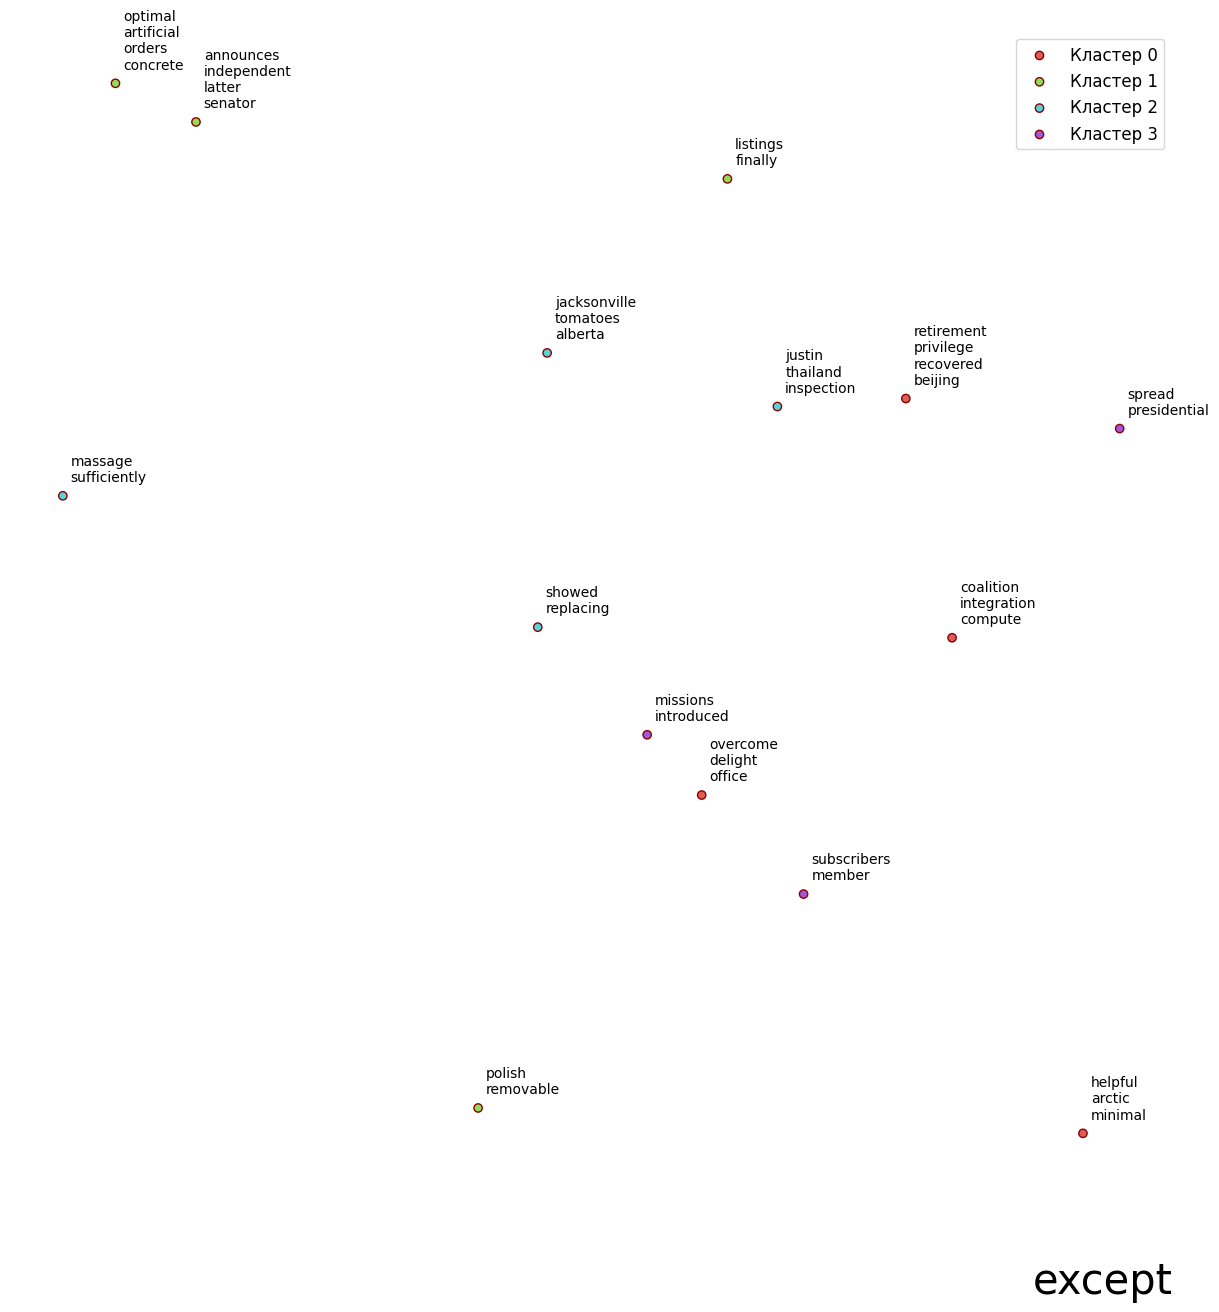

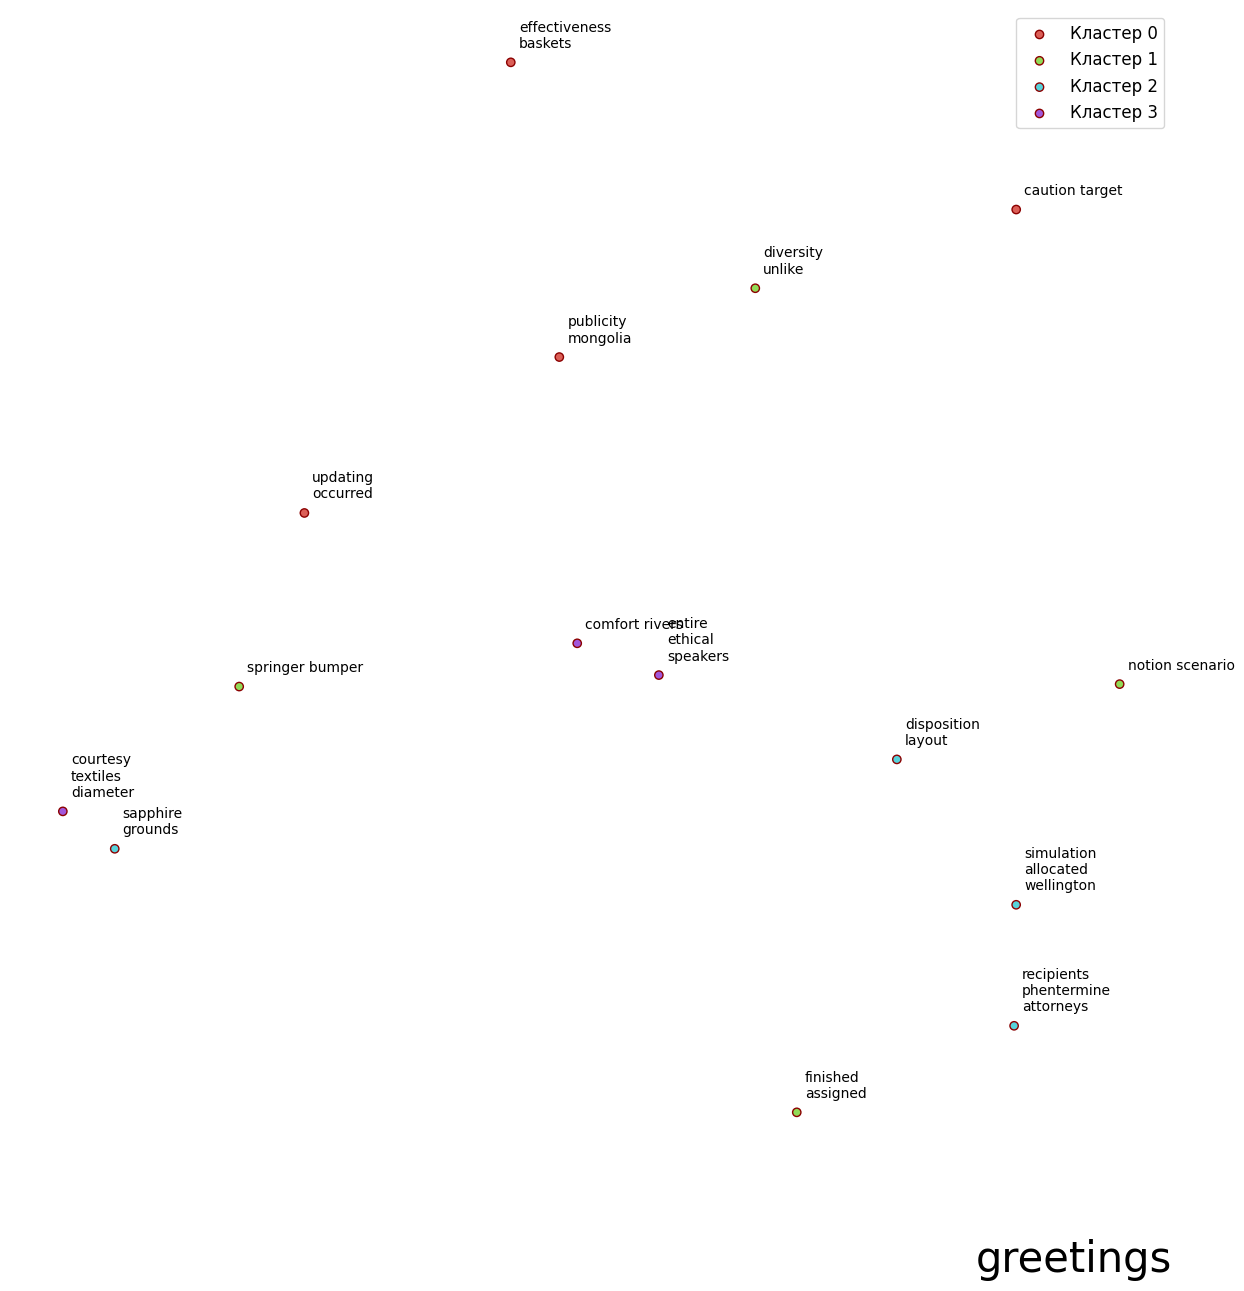

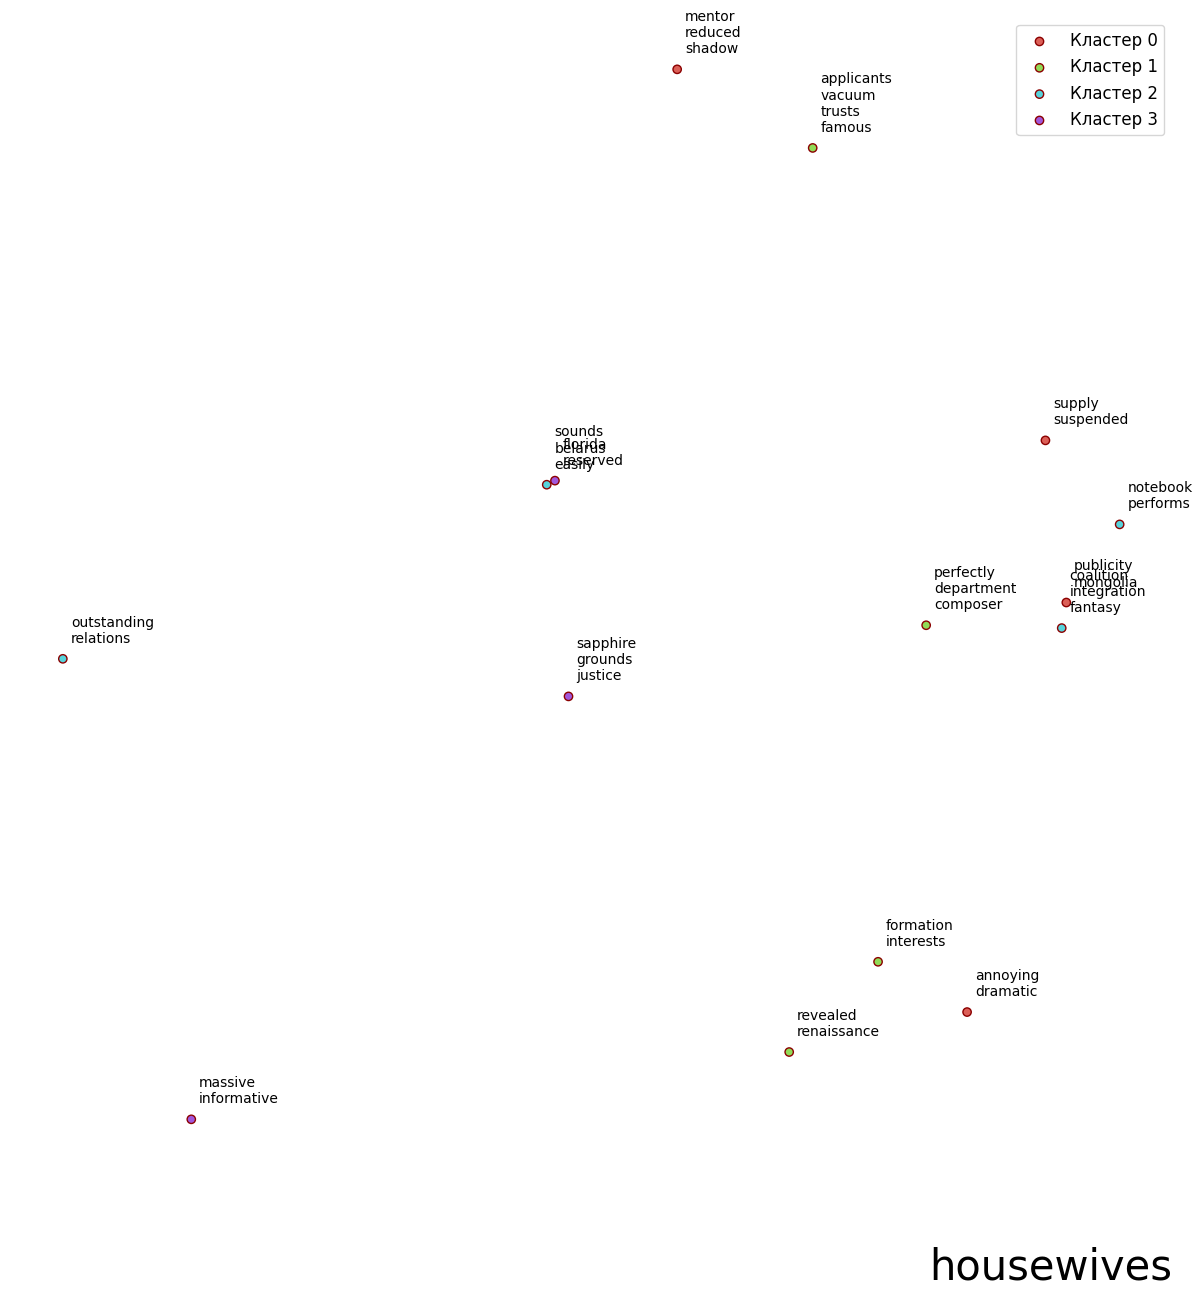

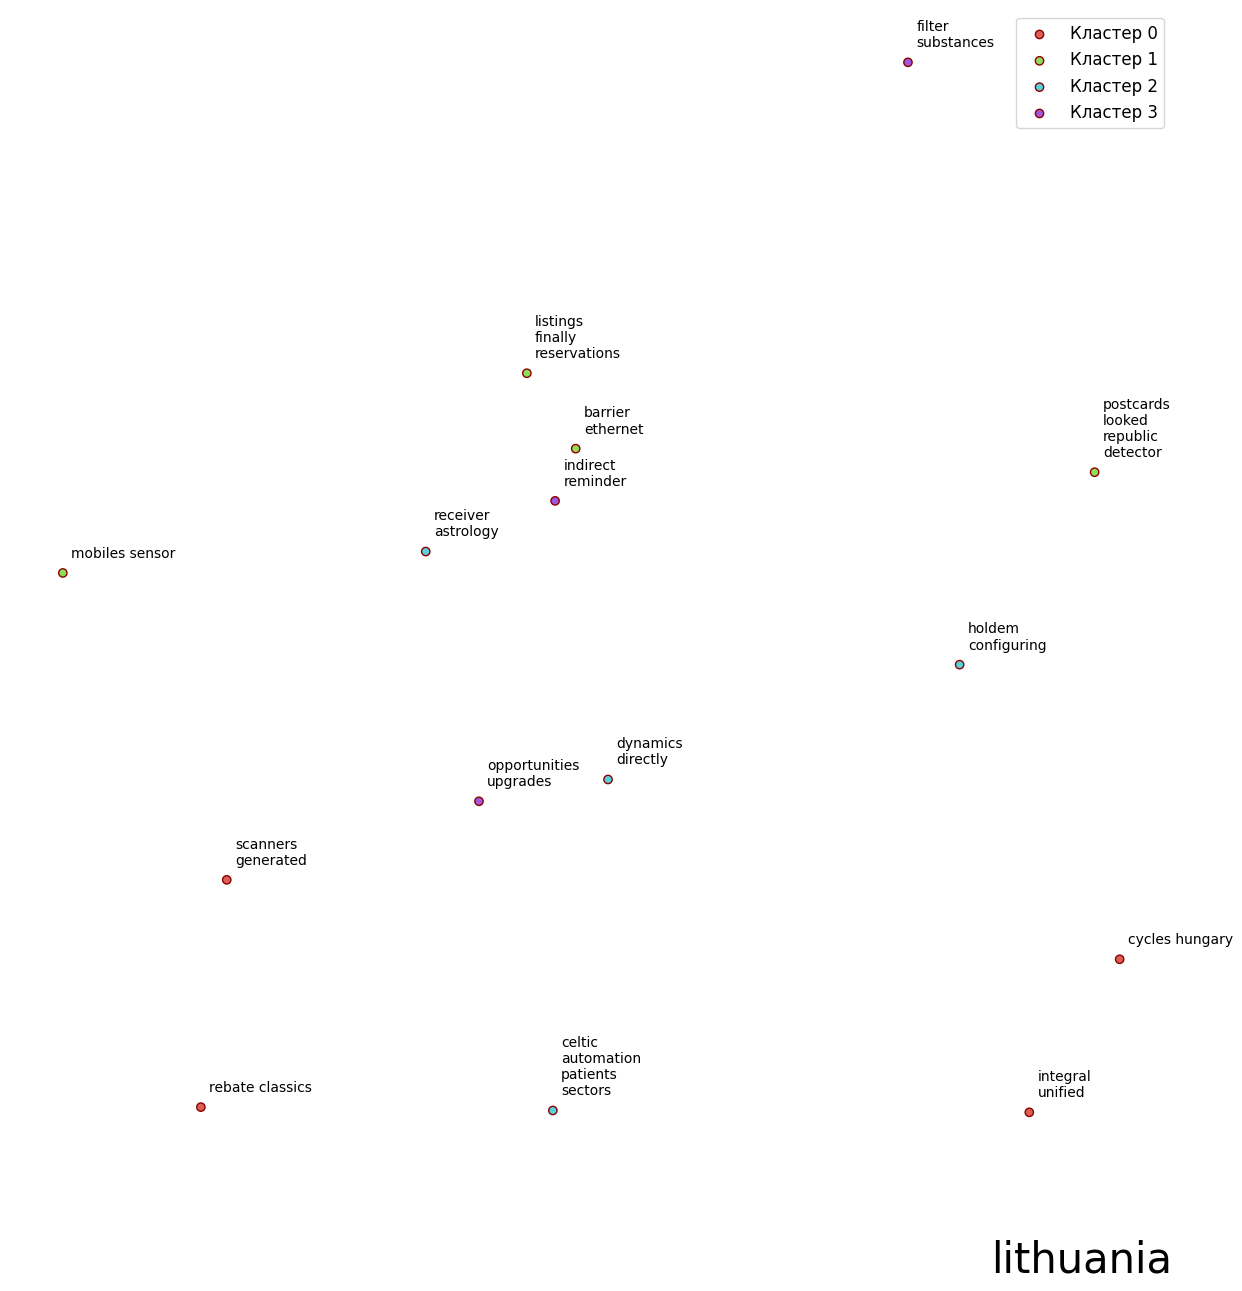

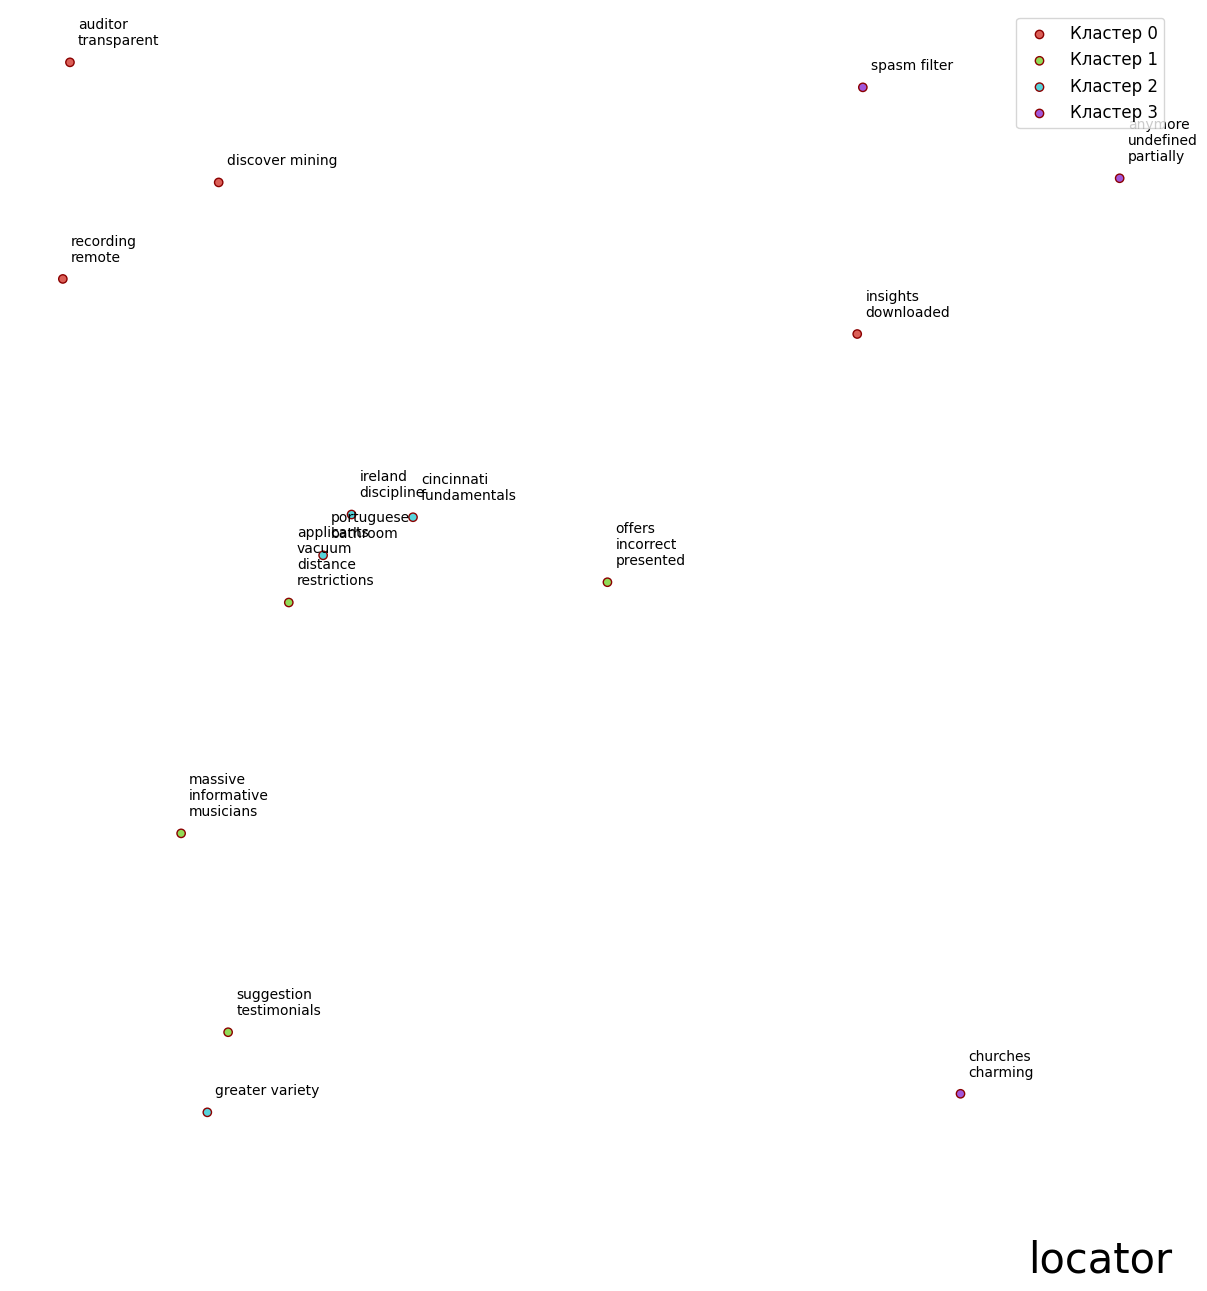

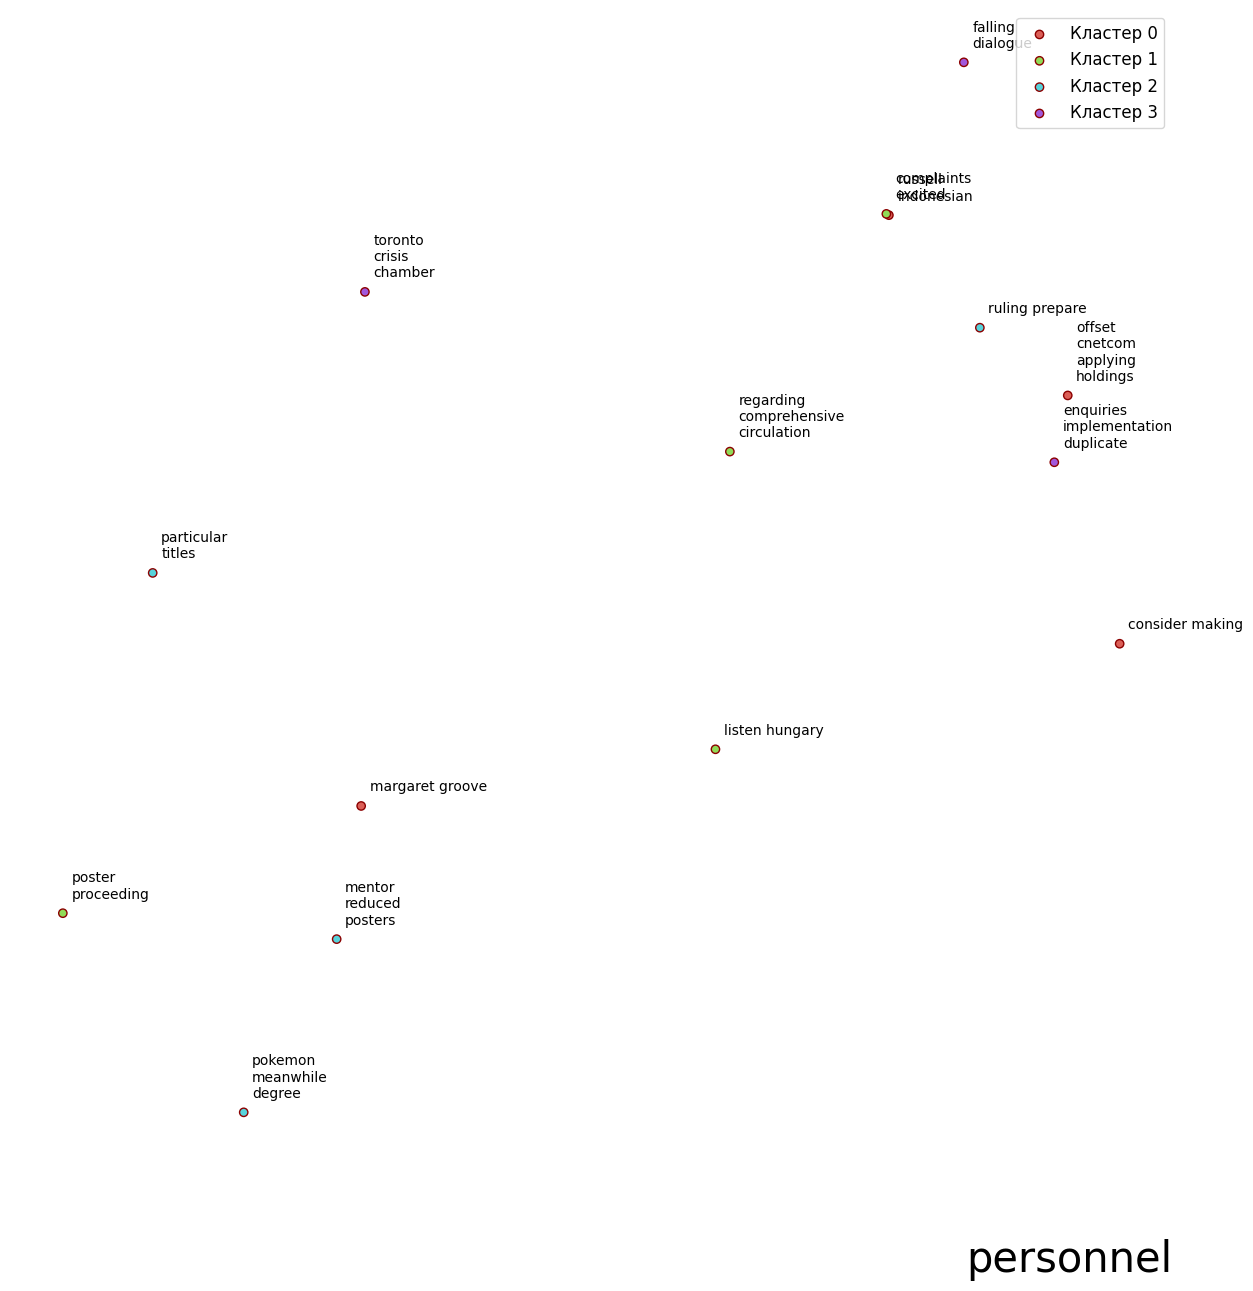

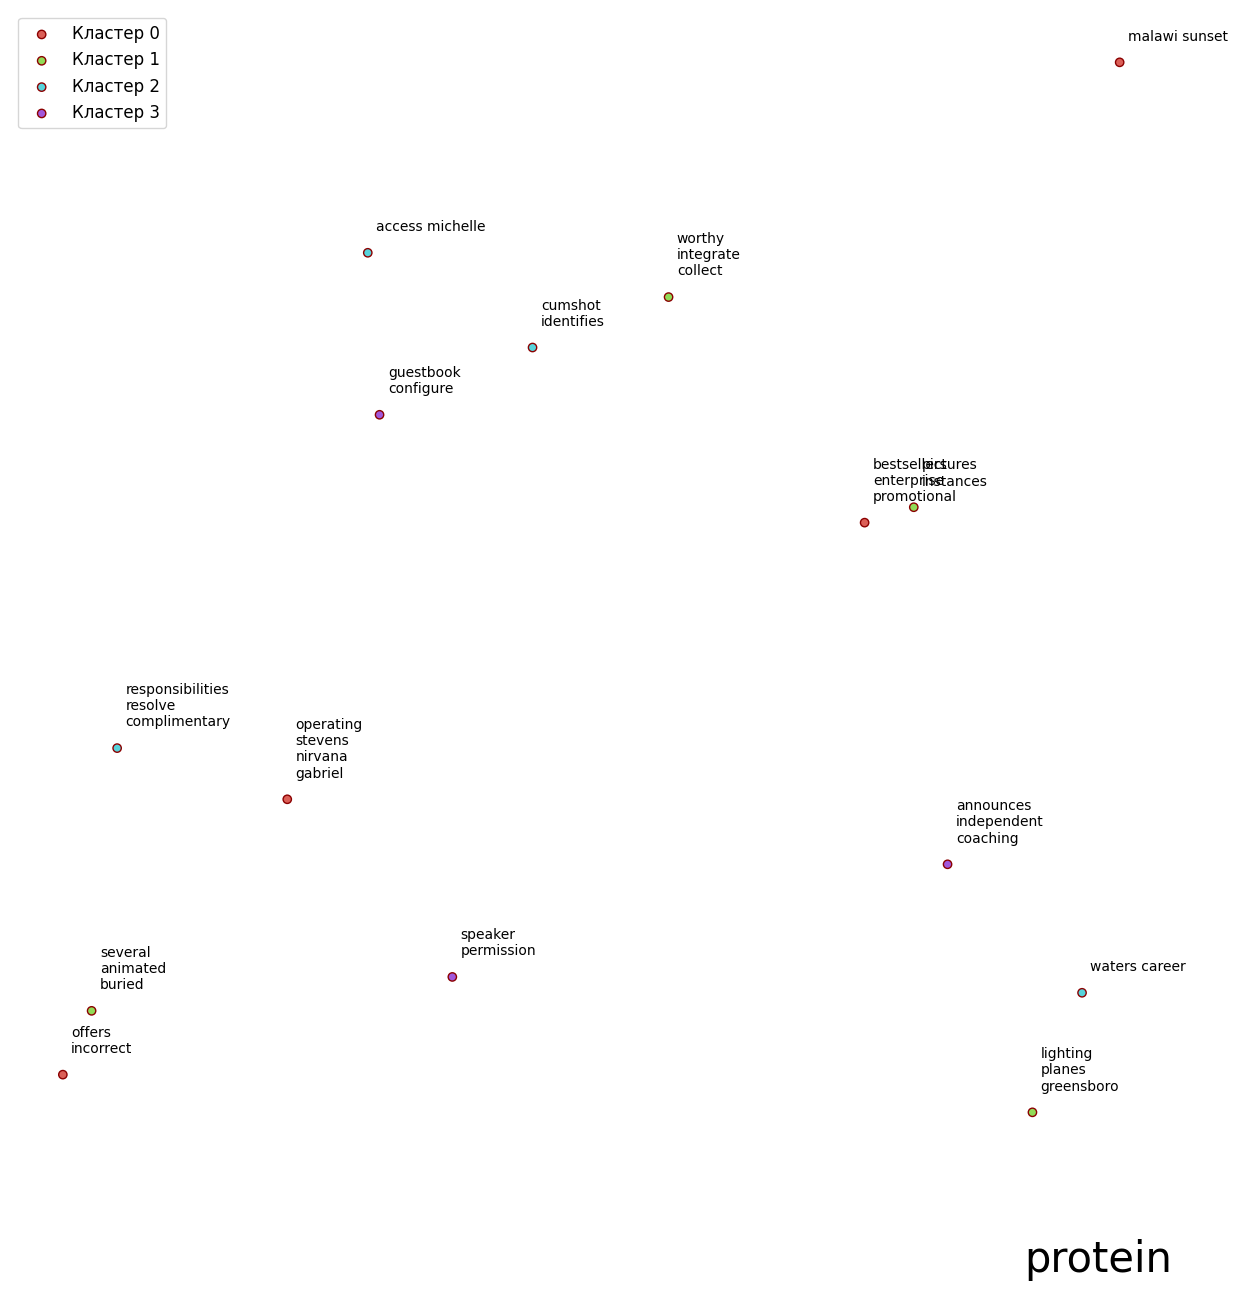

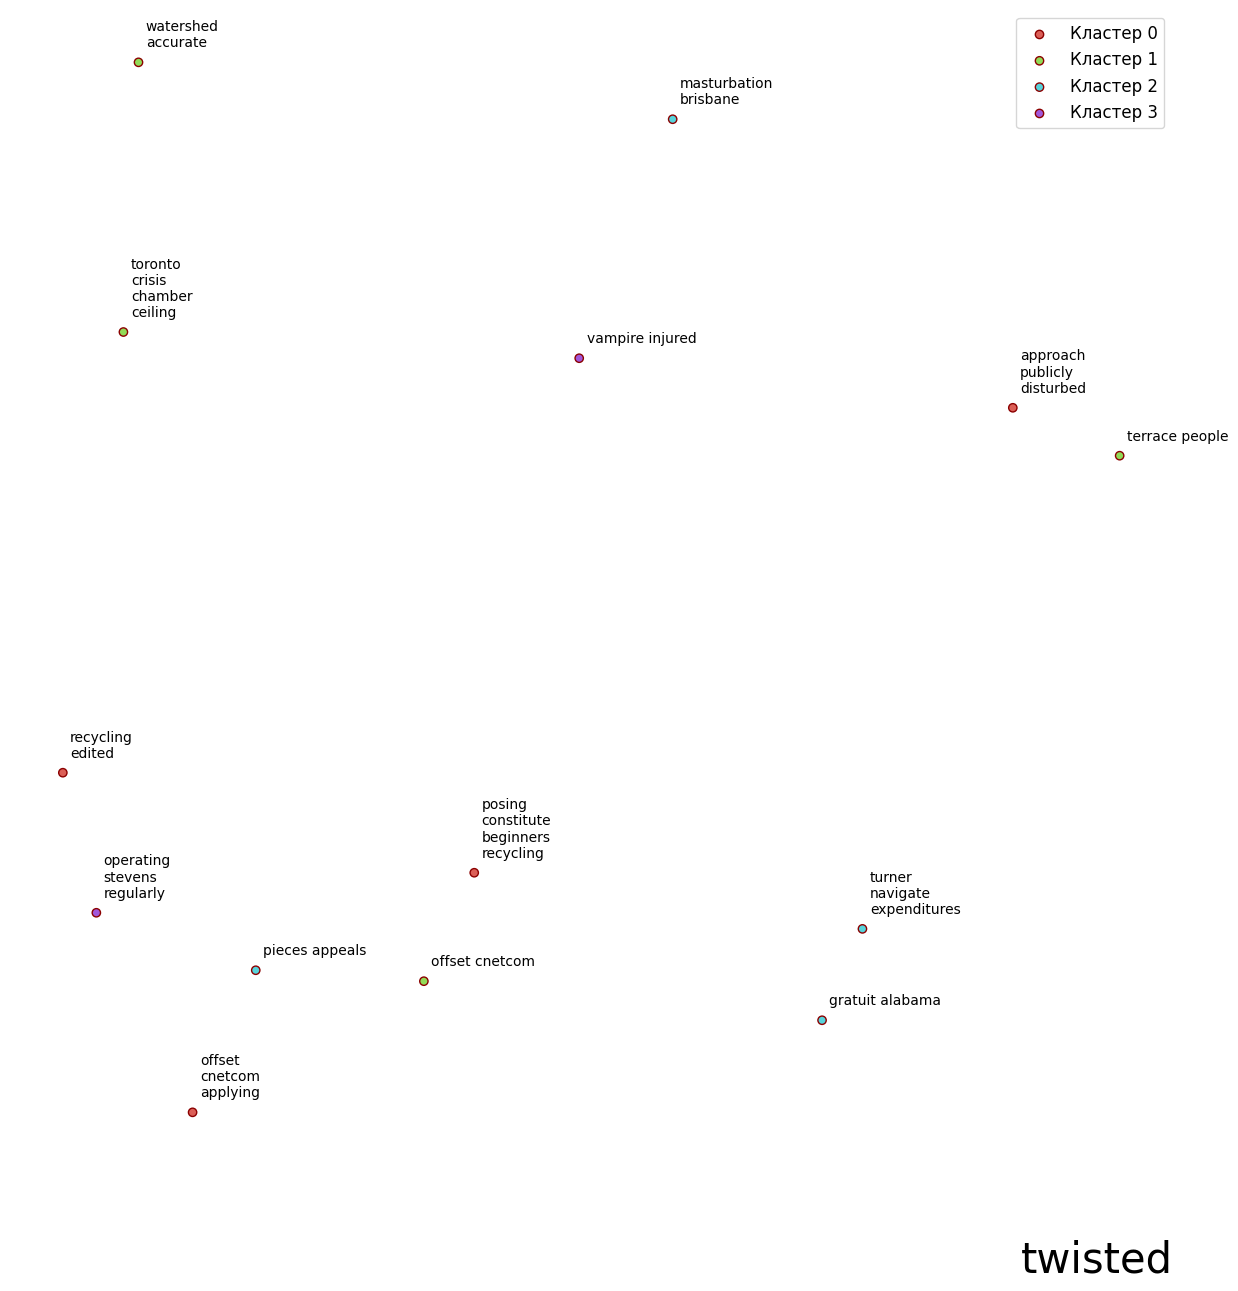

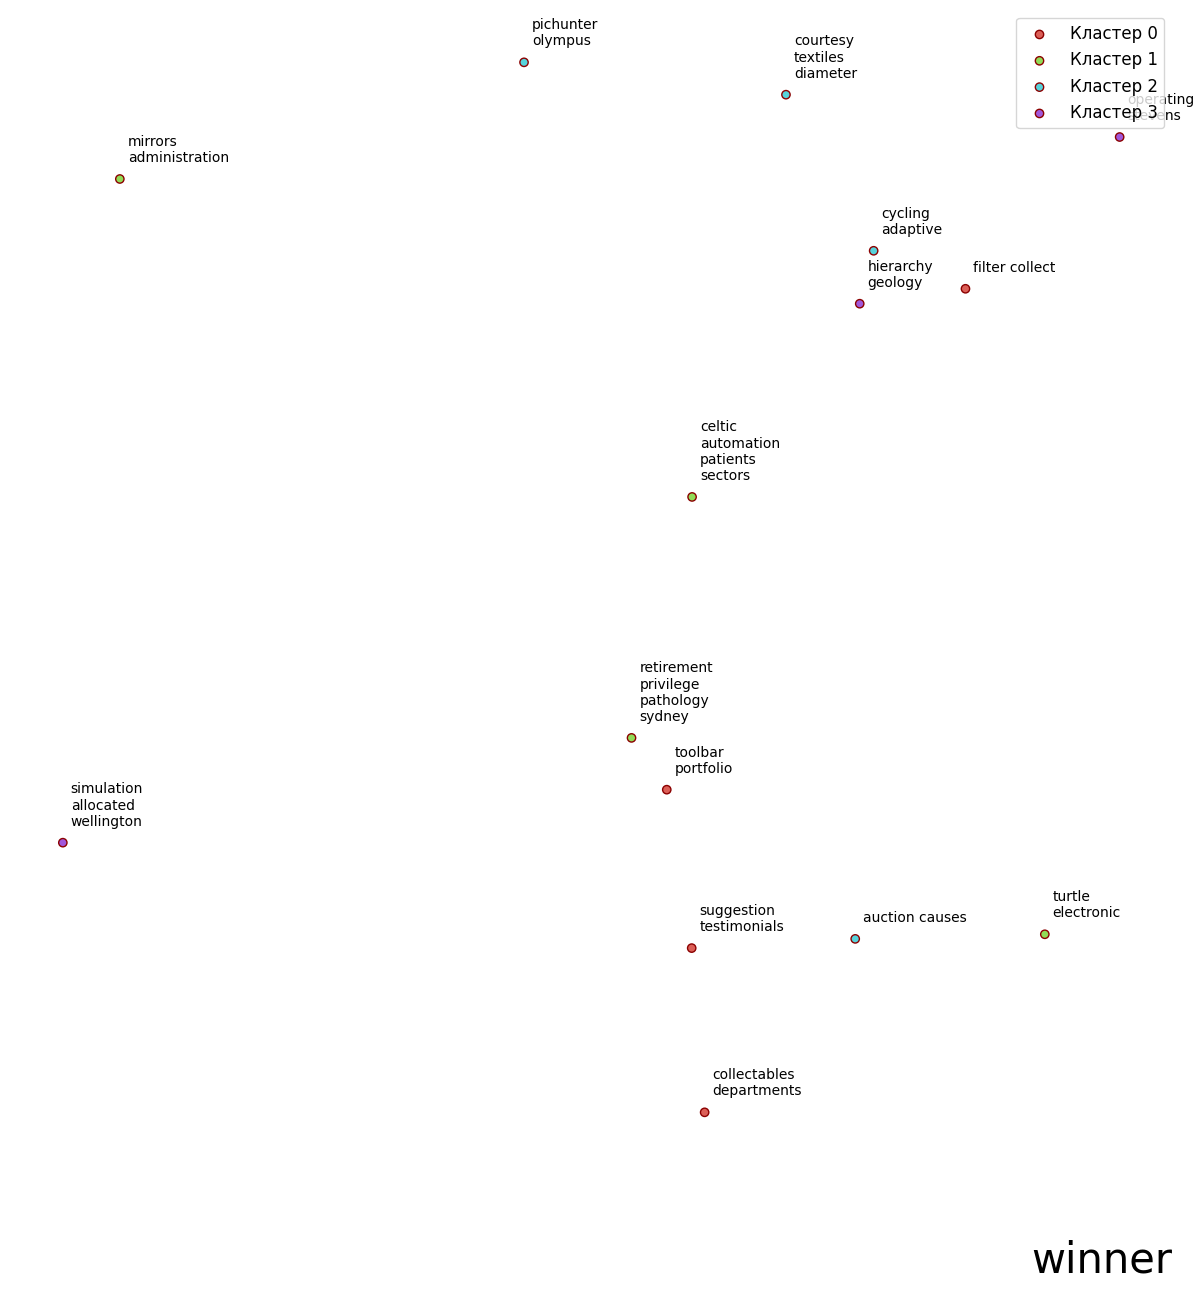

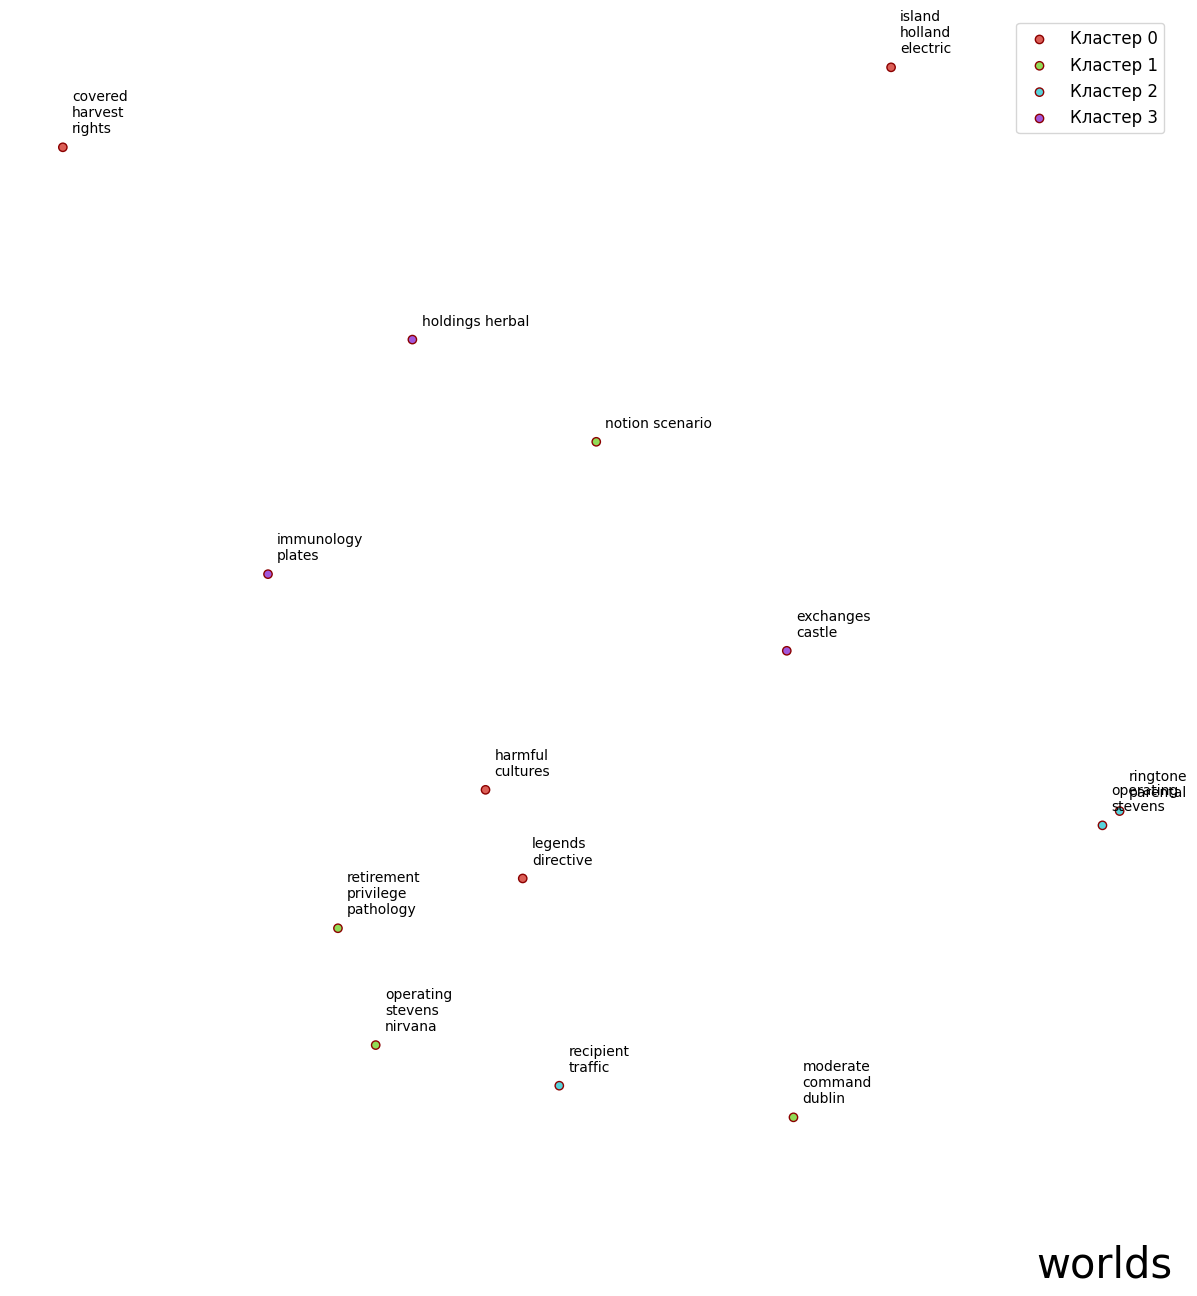

In [31]:
for i in data['area'].unique():
    plt.figure(figsize=(15,15))
    for z in data['cluster_name'].unique():
        scrplt = data.loc[(data['area']==i)&(data['cluster_name']==z)]
        ax = plt.subplot(111)
        ax.scatter(scrplt['x'],
                   scrplt['y'],
                   marker='o',
                   edgecolors = 'darkred',
                   c=scrplt['color'],
                   label=scrplt['cluster_name'].unique()[0])
        for j, label in enumerate(scrplt['keyword'].tolist()):
            if len(label)>15:
                label = label.replace(' ','\n')
            plt.annotate(label,
                         (scrplt['x'].tolist()[j]+0.1,
                          scrplt['y'].tolist()[j]+0.2),
                         size=10)
    ax.axis('off')
    ax.legend(loc=0,fontsize=12)
    ax.set_title(i,loc='right',y=-0.1,size=30)   
    if i.find('\\')>-1:
        i=i.replace("\\","-")
        plt.savefig(f'{i}.png')
    else:
        plt.savefig(f'{i}.png')
    plt.show()
    

Все представленные требования были выполнены. Здесь графики смотреть не очень удобно, но они были сохранены в виде png-файлов.

In [32]:
data.to_csv('tz_data_obrabotka.csv')

И напоследок сохраняем датасет для представления его заказчику.

## Вывод

Проект оказался небольшим. Все, что от меня требовалось - предобработать данные и построить диаграммы рассеяния. Небольшие трудности возникли с проблемой наложения текста и отображением легенды (чтобы она не перекрывала точки, даже автоматический режим отображения легенды не всегда четко срабатывает), но после перебора разных вариантов форматирования был выбран наиболее оптимальный таким образом, чтобы наложений было минимум, а легенды не перекрывали точки на графике.